In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import requests
from bs4 import BeautifulSoup as bts

In [236]:
def getAndParseURL(url):
    result = requests.get(url, headers = {"User-Agent": "OPR/82.0.4227.23"})
    soup = bts(result.text, 'html.parser')
    return soup

In [237]:
PAGE_NUM = []

def findPage(url):
    html = getAndParseURL(url)

    for i in html.findAll("li", {"class":"tm-pagination__list-item"}):
        for b in i.findAll("a"):
            PAGE_NUM.append("https://www.transfermarkt.com"+b["href"])

In [238]:
findPage("https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1")

In [239]:
NEW_PAGE_NUM = PAGE_NUM.copy()
NEW_PAGE_NUM = list(dict.fromkeys(PAGE_NUM))
NEW_PAGE_NUM

['https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=2',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=3',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=4',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=5',
 'https://www.transfermarkt.com/

In [240]:
ALL_PAGES = []
page = 1
while page != 21:
      url = f"https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page={page}"
      ALL_PAGES.append(url)
      page = page + 1
ALL_PAGES

['https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=1',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=2',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=3',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=4',
 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1&page=5',
 'https://www.transfermar

In [241]:
PLAYERS = []

def playerLink(url):
    for page_x in ALL_PAGES:
        html = getAndParseURL(page_x)
    
        for player in html.findAll("td",{"class":"hauptlink"}):
            for j in player.findAll("a"):
                PLAYERS.append("https://www.transfermarkt.com"+j["href"])

In [242]:
playerLink("https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=alle&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1")

In [243]:
PLAYERS

['https://www.transfermarkt.com/kylian-mbappe/profil/spieler/342229',
 'https://www.transfermarkt.com/erling-haaland/profil/spieler/418560',
 'https://www.transfermarkt.com/harry-kane/profil/spieler/132098',
 'https://www.transfermarkt.com/jack-grealish/profil/spieler/203460',
 'https://www.transfermarkt.com/mohamed-salah/profil/spieler/148455',
 'https://www.transfermarkt.com/romelu-lukaku/profil/spieler/96341',
 'https://www.transfermarkt.com/neymar/profil/spieler/68290',
 'https://www.transfermarkt.com/jadon-sancho/profil/spieler/401173',
 'https://www.transfermarkt.com/raheem-sterling/profil/spieler/134425',
 'https://www.transfermarkt.com/marcus-rashford/profil/spieler/258923',
 'https://www.transfermarkt.com/sadio-mane/profil/spieler/200512',
 'https://www.transfermarkt.com/heung-min-son/profil/spieler/91845',
 'https://www.transfermarkt.com/lautaro-martinez/profil/spieler/406625',
 'https://www.transfermarkt.com/lionel-messi/profil/spieler/28003',
 'https://www.transfermarkt.com

In [244]:
len(PLAYERS)

500

In [431]:
from datetime import date

RESULT = []

for p in PLAYERS:
    html = getAndParseURL(p)

    PLAYERS_NAME = html.find('h1',{"itemprop":"name"}).text.strip()
    MARKET_VALUE = html.find('div', {"class":"dataMarktwert"}).text.strip().split('€')[1].split('m')[0]
    POSITION = html.find('dd', {"class":"detail-position__position"}).text.strip()
    CLUB = html.find('span', {"class":"hauptpunkt"}).get_text()
    AGE = html.find('span', {"class":"dataValue"}).text.split()[3].split('(')[1].split(')')[0]
    LEAGUE = html.find('span', {"class":"mediumpunkt"}).text.strip()
    html_table = [th.getText() for th in html.find('table',{"class":"items"}).findAll('tr', limit=2)[1]]
    SEASON_MATCHES = html_table[3]
    SEASON_GOALS = html_table[4]
    SEASON_ASSISTS = html_table[5]
    S_MINUTES_PER_GOAL = html_table[6]
    S_MINUTES_PLAYED = html_table[7]
    INTERNATIONAL = html.findAll('span', {"class":"dataValue"})[2].text.strip()
    z = html.find('div', {"class":"info-table info-table--right-space"})
    if z != None:

        for i in range(len(z.findAll('span',{"class":"info-table__content info-table__content--regular"}))):
            if z.findAll('span',{"class":"info-table__content info-table__content--regular"})[i].text.strip() == 'Foot:':
                FOOT = z.findAll('span',{"info-table__content info-table__content--bold"})[i].text.strip()
    
    else:
        z = html.find('div', {"class":"info-table info-table--right-space min-height-audio"})
        
        for i in range(len(z.findAll('span',{"class":"info-table__content info-table__content--regular"}))):
            if z.findAll('span',{"class":"info-table__content info-table__content--regular"})[i].text.strip() == 'Foot:':
                FOOT = z.findAll('span',{"info-table__content info-table__content--bold"})[i].text.strip()
    
    DATE = date.today()
    RESULT.append([PLAYERS_NAME, MARKET_VALUE, POSITION, CLUB, AGE, LEAGUE, SEASON_MATCHES, SEASON_GOALS, SEASON_ASSISTS, S_MINUTES_PER_GOAL, S_MINUTES_PLAYED, INTERNATIONAL, FOOT, DATE])
    
    
    
column = ["PLAYERS_NAME", "MARKET_VALUE", "POSITION", "CLUB", "AGE", "LEAGUE", "SEASON_MATCHES", "SEASON_GOALS", "SEASON_ASSISTS", "S_MINUTES_PER_GOAL", "S_MINUTES_PLAYED", "INTERNATIONAL", "FOOT", "DATE"]
df = pd.DataFrame.from_records(RESULT, columns=column)

df




,PLAYERS_NAME,MARKET_VALUE,POSITION,CLUB,AGE,LEAGUE,SEASON_MATCHES,SEASON_GOALS,SEASON_ASSISTS,S_MINUTES_PER_GOAL,S_MINUTES_PLAYED,INTERNATIONAL,FOOT,DATE
0,Kylian Mbappé,160.00,Centre-Forward,Paris SG,22,Ligue 1,23,13,14,148,1.926,France,right,2021-12-15
1,Erling Haaland,150.00,Centre-Forward,Bor. Dortmund,21,Bundesliga,14,17,5,65,1.112,Norway,left,2021-12-15
2,Harry Kane,120.00,Centre-Forward,Spurs,28,Premier League,20,8,2,202,1.615,England,right,2021-12-15
3,Jack Grealish,100.00,Left Winger,Man City,26,Premier League,20,3,3,469,1.406,England,right,2021-12-15
4,Mohamed Salah,100.00,Right Winger,Liverpool,29,Premier League,22,21,9,91,1.908,Egypt,left,2021-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Callum Robinson,6.00,Centre-Forward,West Brom,26,Championship,20,4,6,295,1.178,Ireland,right,2021-12-15
496,Rony Lopes,6.00,Right Winger,Olympiacos,25,Super League 1,15,2,2,278,556,Portugal,left,2021-12-15
497,Djordje Despotovic,6.00,Centre-Forward,Rubin Kazan,29,Premier Liga,10,1,1,596,596,Serbia,left,2021-12-15
498,Roberto Inglese,6.00,Centre-Forward,Parma,30,Serie B,17,3,2,253,760,Italy,right,2021-12-15


In [245]:
#for Kylian Mbappe
html = getAndParseURL(PLAYERS[0])
html.find('div', {"class":"dataMarktwert"}).text.strip().split('€')[1].split('m')[0]

'160.00'

In [246]:
html = getAndParseURL(PLAYERS[0])
html.find('dd', {"class":"detail-position__position"}).text.strip()

'Centre-Forward'

In [253]:
html = getAndParseURL(PLAYERS[0])
html.find('span', {"class":"hauptpunkt"}).get_text()

'Paris SG'

In [259]:
html = getAndParseURL(PLAYERS[0])
html.find('span', {"class":"mediumpunkt"}).text.strip()

'Ligue 1'

In [292]:
html = getAndParseURL(PLAYERS[0])
html.find('span', {"class":"dataValue"}).text.split()[3].split('(')[1].split(')')[0]

'22'

In [281]:
html = getAndParseURL(PLAYERS[0])
html_table = [th.getText() for th in html.find('table',{"class":"items"}).findAll('tr', limit=2)[1]]
html_table[7]

'1.926'

In [290]:
html = getAndParseURL(PLAYERS[0])
html.findAll('span', {"class":"dataValue"})[2].text.strip()

'France'

In [399]:

html = getAndParseURL(PLAYERS[0])
z = html.find('div', {"class":"info-table info-table--right-space"})
if z != None:


    for i in range(len(z.findAll('span',{"class":"info-table__content info-table__content--regular"}))):
        if z.findAll('span',{"class":"info-table__content info-table__content--regular"})[i].text.strip() == 'Foot:':
            print(z.findAll('span',{"info-table__content info-table__content--bold"})[i].text.strip())
    
else:
    z = html.find('div', {"class":"info-table info-table--right-space min-height-audio"})
        
    for i in range(len(z.findAll('span',{"class":"info-table__content info-table__content--regular"}))):
        if z.findAll('span',{"class":"info-table__content info-table__content--regular"})[i].text.strip() == 'Foot:':
            print(z.findAll('span',{"info-table__content info-table__content--bold"})[i].text.strip())



right


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PLAYERS_NAME        500 non-null    object
 1   MARKET_VALUE        500 non-null    object
 2   POSITION            500 non-null    object
 3   CLUB                500 non-null    object
 4   AGE                 500 non-null    object
 5   LEAGUE              500 non-null    object
 6   SEASON_MATCHES      500 non-null    object
 7   SEASON_GOALS        500 non-null    object
 8   SEASON_ASSISTS      500 non-null    object
 9   S_MINUTES_PER_GOAL  500 non-null    object
 10  S_MINUTES_PLAYED    500 non-null    object
 11  INTERNATIONAL       500 non-null    object
 12  FOOT                500 non-null    object
 13  DATE                500 non-null    object
dtypes: object(14)
memory usage: 54.8+ KB


In [433]:
print(df.isnull().sum())

PLAYERS_NAME          0
MARKET_VALUE          0
POSITION              0
CLUB                  0
AGE                   0
LEAGUE                0
SEASON_MATCHES        0
SEASON_GOALS          0
SEASON_ASSISTS        0
S_MINUTES_PER_GOAL    0
S_MINUTES_PLAYED      0
INTERNATIONAL         0
FOOT                  0
DATE                  0
dtype: int64


In [476]:
df_yedek = df.copy()

In [434]:
df.sample(10, random_state = 43)

,PLAYERS_NAME,MARKET_VALUE,POSITION,CLUB,AGE,LEAGUE,SEASON_MATCHES,SEASON_GOALS,SEASON_ASSISTS,S_MINUTES_PER_GOAL,S_MINUTES_PLAYED,INTERNATIONAL,FOOT,DATE
17,Serge Gnabry,70.00,Right Winger,FC Bayern,26,Bundesliga,23,11,6,113,1.238,Germany,right,2021-12-15
127,Sasa Kalajdzic,22.00,Centre-Forward,VfB Stuttgart,24,Bundesliga,1,-,-,-,17,Austria,left,2021-12-15
363,Chidera Ejuke,8.00,Left Winger,CSKA Moscow,23,Premier Liga,18,4,3,341,1.364,Nigeria,right,2021-12-15
82,Joaquín Correa,30.00,Second Striker,Inter,27,Serie A,16,4,1,150,598,Argentina,right,2021-12-15
60,Moise Kean,35.00,Centre-Forward,Juventus,21,Serie A,18,3,-,192,576,Italy,right,2021-12-15
251,Alan Velasco,12.00,Left Winger,Independiente,19,Liga Profesional,43,2,7,1.509,3.017,Argentina,right,2021-12-15
258,Eddie Nketiah,12.00,Centre-Forward,Arsenal,22,Premier League,5,2,-,132,264,England,right,2021-12-15
339,Wanderson,9.00,Right Winger,Krasnodar,27,Premier Liga,251,28,43,568,15.901,Brazil,right,2021-12-15
208,Calvin Stengs,15.00,Right Winger,OGC Nice,22,Ligue 1,13,1,-,699,699,Netherlands,left,2021-12-15
67,Wissam Ben Yedder,35.00,Centre-Forward,Monaco,31,Ligue 1,27,11,3,141,1.555,France,both,2021-12-15


In [477]:
for i in range(len(df["S_MINUTES_PLAYED"])):
    df["S_MINUTES_PLAYED"][i] = df["S_MINUTES_PLAYED"][i].replace('.','')

for i in range(len(df["S_MINUTES_PER_GOAL"])):
    df["S_MINUTES_PER_GOAL"][i] = df["S_MINUTES_PER_GOAL"][i].replace('.','')


In [478]:
df.sample(10, random_state = 43)

,PLAYERS_NAME,MARKET_VALUE,POSITION,CLUB,AGE,LEAGUE,SEASON_MATCHES,SEASON_GOALS,SEASON_ASSISTS,S_MINUTES_PER_GOAL,S_MINUTES_PLAYED,INTERNATIONAL,FOOT,DATE
17,Serge Gnabry,70.00,Right Winger,FC Bayern,26,Bundesliga,23,11,6,113,1238,Germany,right,2021-12-15
127,Sasa Kalajdzic,22.00,Centre-Forward,VfB Stuttgart,24,Bundesliga,1,-,-,-,17,Austria,left,2021-12-15
363,Chidera Ejuke,8.00,Left Winger,CSKA Moscow,23,Premier Liga,18,4,3,341,1364,Nigeria,right,2021-12-15
82,Joaquín Correa,30.00,Second Striker,Inter,27,Serie A,16,4,1,150,598,Argentina,right,2021-12-15
60,Moise Kean,35.00,Centre-Forward,Juventus,21,Serie A,18,3,-,192,576,Italy,right,2021-12-15
251,Alan Velasco,12.00,Left Winger,Independiente,19,Liga Profesional,43,2,7,1509,3017,Argentina,right,2021-12-15
258,Eddie Nketiah,12.00,Centre-Forward,Arsenal,22,Premier League,5,2,-,132,264,England,right,2021-12-15
339,Wanderson,9.00,Right Winger,Krasnodar,27,Premier Liga,251,28,43,568,15901,Brazil,right,2021-12-15
208,Calvin Stengs,15.00,Right Winger,OGC Nice,22,Ligue 1,13,1,-,699,699,Netherlands,left,2021-12-15
67,Wissam Ben Yedder,35.00,Centre-Forward,Monaco,31,Ligue 1,27,11,3,141,1555,France,both,2021-12-15


In [479]:
df['SEASON_GOALS'] = df['SEASON_GOALS'].replace('-',0)
df['SEASON_MATCHES'] = df['SEASON_MATCHES'].replace('-',0)
df['SEASON_ASSISTS'] = df['SEASON_ASSISTS'].replace('-',0)
df['S_MINUTES_PER_GOAL'] = df['S_MINUTES_PER_GOAL'].replace('-',0)
df['S_MINUTES_PLAYED'] = df['S_MINUTES_PLAYED'].replace('-',0)


In [480]:
df.sample(10, random_state = 43)

,PLAYERS_NAME,MARKET_VALUE,POSITION,CLUB,AGE,LEAGUE,SEASON_MATCHES,SEASON_GOALS,SEASON_ASSISTS,S_MINUTES_PER_GOAL,S_MINUTES_PLAYED,INTERNATIONAL,FOOT,DATE
17,Serge Gnabry,70.00,Right Winger,FC Bayern,26,Bundesliga,23,11,6,113,1238,Germany,right,2021-12-15
127,Sasa Kalajdzic,22.00,Centre-Forward,VfB Stuttgart,24,Bundesliga,1,0,0,0,17,Austria,left,2021-12-15
363,Chidera Ejuke,8.00,Left Winger,CSKA Moscow,23,Premier Liga,18,4,3,341,1364,Nigeria,right,2021-12-15
82,Joaquín Correa,30.00,Second Striker,Inter,27,Serie A,16,4,1,150,598,Argentina,right,2021-12-15
60,Moise Kean,35.00,Centre-Forward,Juventus,21,Serie A,18,3,0,192,576,Italy,right,2021-12-15
251,Alan Velasco,12.00,Left Winger,Independiente,19,Liga Profesional,43,2,7,1509,3017,Argentina,right,2021-12-15
258,Eddie Nketiah,12.00,Centre-Forward,Arsenal,22,Premier League,5,2,0,132,264,England,right,2021-12-15
339,Wanderson,9.00,Right Winger,Krasnodar,27,Premier Liga,251,28,43,568,15901,Brazil,right,2021-12-15
208,Calvin Stengs,15.00,Right Winger,OGC Nice,22,Ligue 1,13,1,0,699,699,Netherlands,left,2021-12-15
67,Wissam Ben Yedder,35.00,Centre-Forward,Monaco,31,Ligue 1,27,11,3,141,1555,France,both,2021-12-15


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PLAYERS_NAME        500 non-null    object
 1   MARKET_VALUE        500 non-null    object
 2   POSITION            500 non-null    object
 3   CLUB                500 non-null    object
 4   AGE                 500 non-null    object
 5   LEAGUE              500 non-null    object
 6   SEASON_MATCHES      500 non-null    object
 7   SEASON_GOALS        500 non-null    object
 8   SEASON_ASSISTS      500 non-null    object
 9   S_MINUTES_PER_GOAL  500 non-null    object
 10  S_MINUTES_PLAYED    500 non-null    object
 11  INTERNATIONAL       500 non-null    object
 12  FOOT                500 non-null    object
 13  DATE                500 non-null    object
dtypes: object(14)
memory usage: 54.8+ KB


In [482]:
df["SEASON_MATCHES"] = df["SEASON_MATCHES"].astype(str).astype(int)
df["SEASON_GOALS"] = df["SEASON_GOALS"].astype(str).astype(int)
df["MARKET_VALUE"] = df["MARKET_VALUE"].astype(str).astype(float)
df["AGE"] = df["AGE"].astype(str).astype(int)
df["SEASON_ASSISTS"] = df["SEASON_ASSISTS"].astype(str).astype(int)
df["S_MINUTES_PER_GOAL"] = df["S_MINUTES_PER_GOAL"].astype(str).astype(int)
df["S_MINUTES_PLAYED"] = df["S_MINUTES_PLAYED"].astype(str).astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PLAYERS_NAME        500 non-null    object 
 1   MARKET_VALUE        500 non-null    float64
 2   POSITION            500 non-null    object 
 3   CLUB                500 non-null    object 
 4   AGE                 500 non-null    int32  
 5   LEAGUE              500 non-null    object 
 6   SEASON_MATCHES      500 non-null    int32  
 7   SEASON_GOALS        500 non-null    int32  
 8   SEASON_ASSISTS      500 non-null    int32  
 9   S_MINUTES_PER_GOAL  500 non-null    int32  
 10  S_MINUTES_PLAYED    500 non-null    int32  
 11  INTERNATIONAL       500 non-null    object 
 12  FOOT                500 non-null    object 
 13  DATE                500 non-null    object 
dtypes: float64(1), int32(6), object(7)
memory usage: 43.1+ KB


In [483]:
df.describe()

,MARKET_VALUE,AGE,SEASON_MATCHES,SEASON_GOALS,SEASON_ASSISTS,S_MINUTES_PER_GOAL,S_MINUTES_PLAYED
count,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,19.365400,24.96200,19.806000,5.48400,2.758000,284.806000,1270.136000
std,19.189532,3.64735,21.034954,8.03136,3.611304,259.841582,1448.598595
min,6.000000,16.00000,1.000000,0.00000,0.000000,0.000000,17.000000
25%,8.000000,22.00000,13.750000,2.00000,1.000000,146.500000,686.250000
50%,12.500000,25.00000,17.000000,4.00000,2.000000,218.500000,1106.000000
75%,22.000000,28.00000,21.000000,7.00000,3.000000,341.500000,1434.500000
max,160.000000,36.00000,287.000000,130.00000,43.000000,1838.000000,18586.000000


In [489]:
df.nunique()

PLAYERS_NAME          497
MARKET_VALUE           50
POSITION                4
CLUB                  175
AGE                    20
LEAGUE                 27
SEASON_MATCHES         55
SEASON_GOALS           30
SEASON_ASSISTS         18
S_MINUTES_PER_GOAL    296
S_MINUTES_PLAYED      443
INTERNATIONAL          73
FOOT                    3
DATE                    1
dtype: int64

In [513]:
foot = pd.Series.to_frame(df['FOOT'].value_counts())
foot.index

Index(['right', 'left', 'both'], dtype='object')

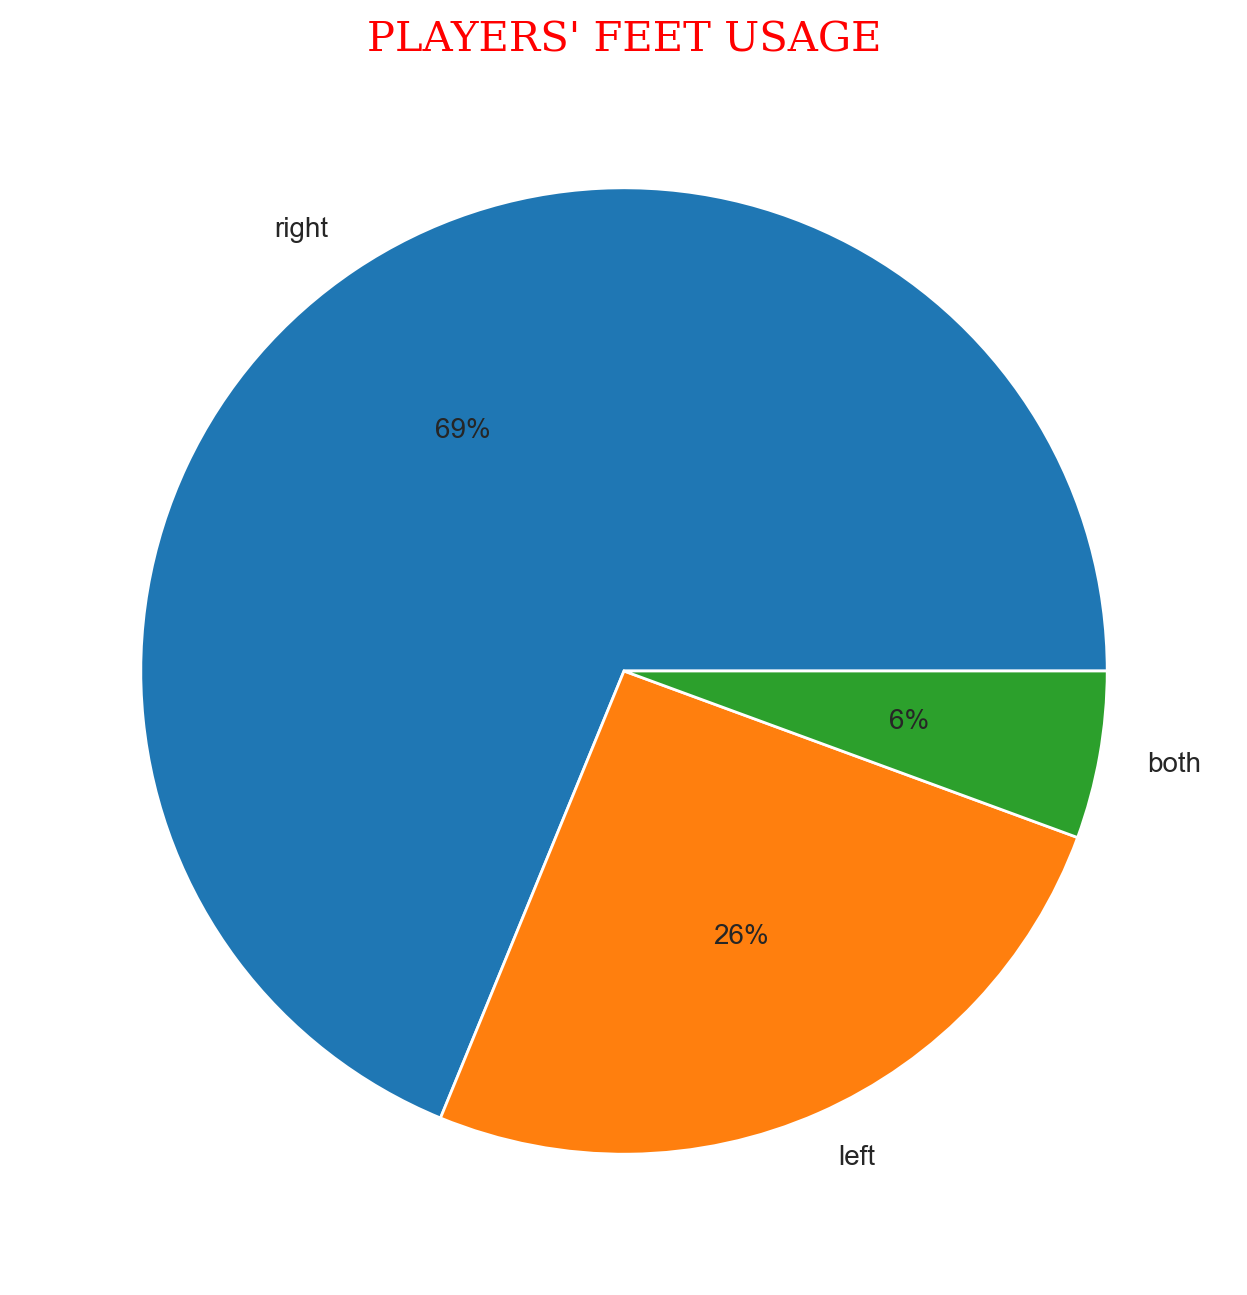

In [555]:
plt.figure(figsize=(12,8),dpi=200)

plt.pie(foot["FOOT"],labels= foot.index, autopct='%.0f%%', explode = [0,0,0])
plt.title("PLAYERS' FEET USAGE", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\Players'FeetUsage.png", dpi=200)

In [519]:
position = pd.Series.to_frame(df['POSITION'].value_counts())
position

,POSITION
Centre-Forward,225
Left Winger,136
Right Winger,121
Second Striker,18


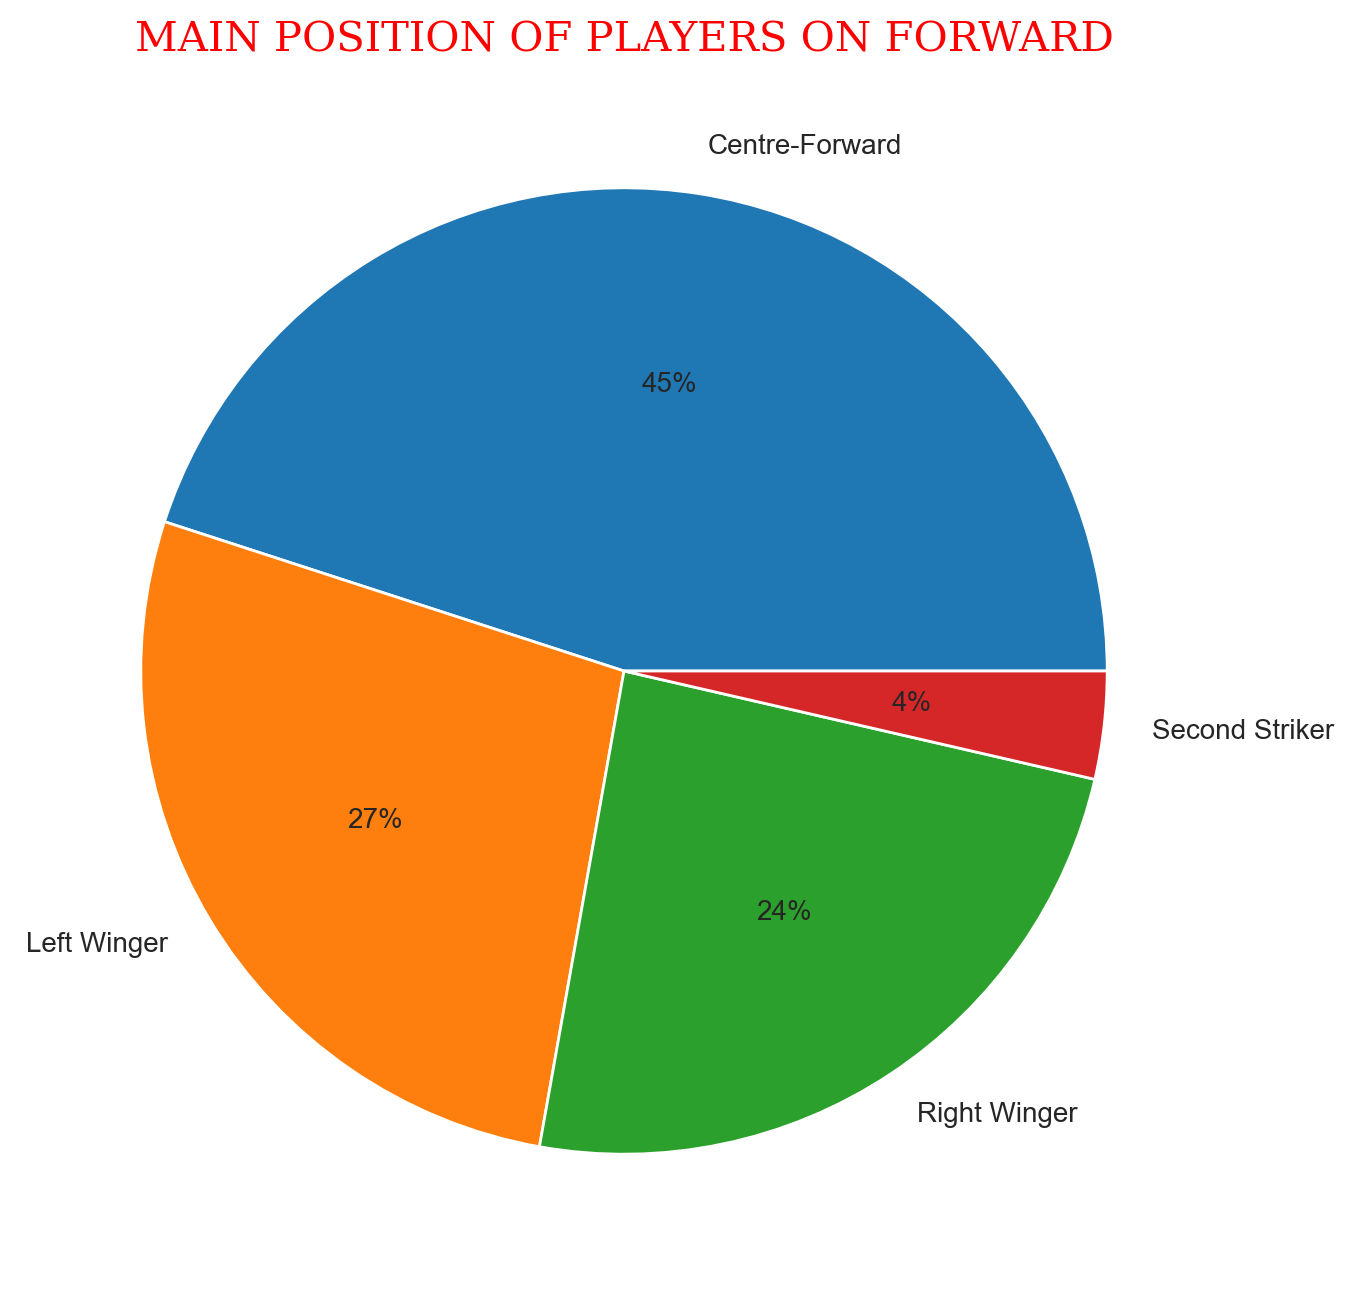

In [557]:
plt.figure(figsize=(12,8),dpi=200)

plt.pie(position["POSITION"],labels= position.index, autopct='%.0f%%', explode = [0,0,0,0])
plt.title("MAIN POSITION OF PLAYERS ON FORWARD", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\Players'MainPosition.png", dpi=200)

In [523]:
age = pd.Series.to_frame(df['AGE'].value_counts())
age

,AGE
24,61
25,59
23,44
22,39
26,39
27,37
21,37
28,35
29,34
30,29


In [525]:
national = pd.Series.to_frame(df['INTERNATIONAL'].value_counts())
national.iloc[:5]

,INTERNATIONAL
Brazil,49
Spain,43
France,36
England,34
Argentina,26


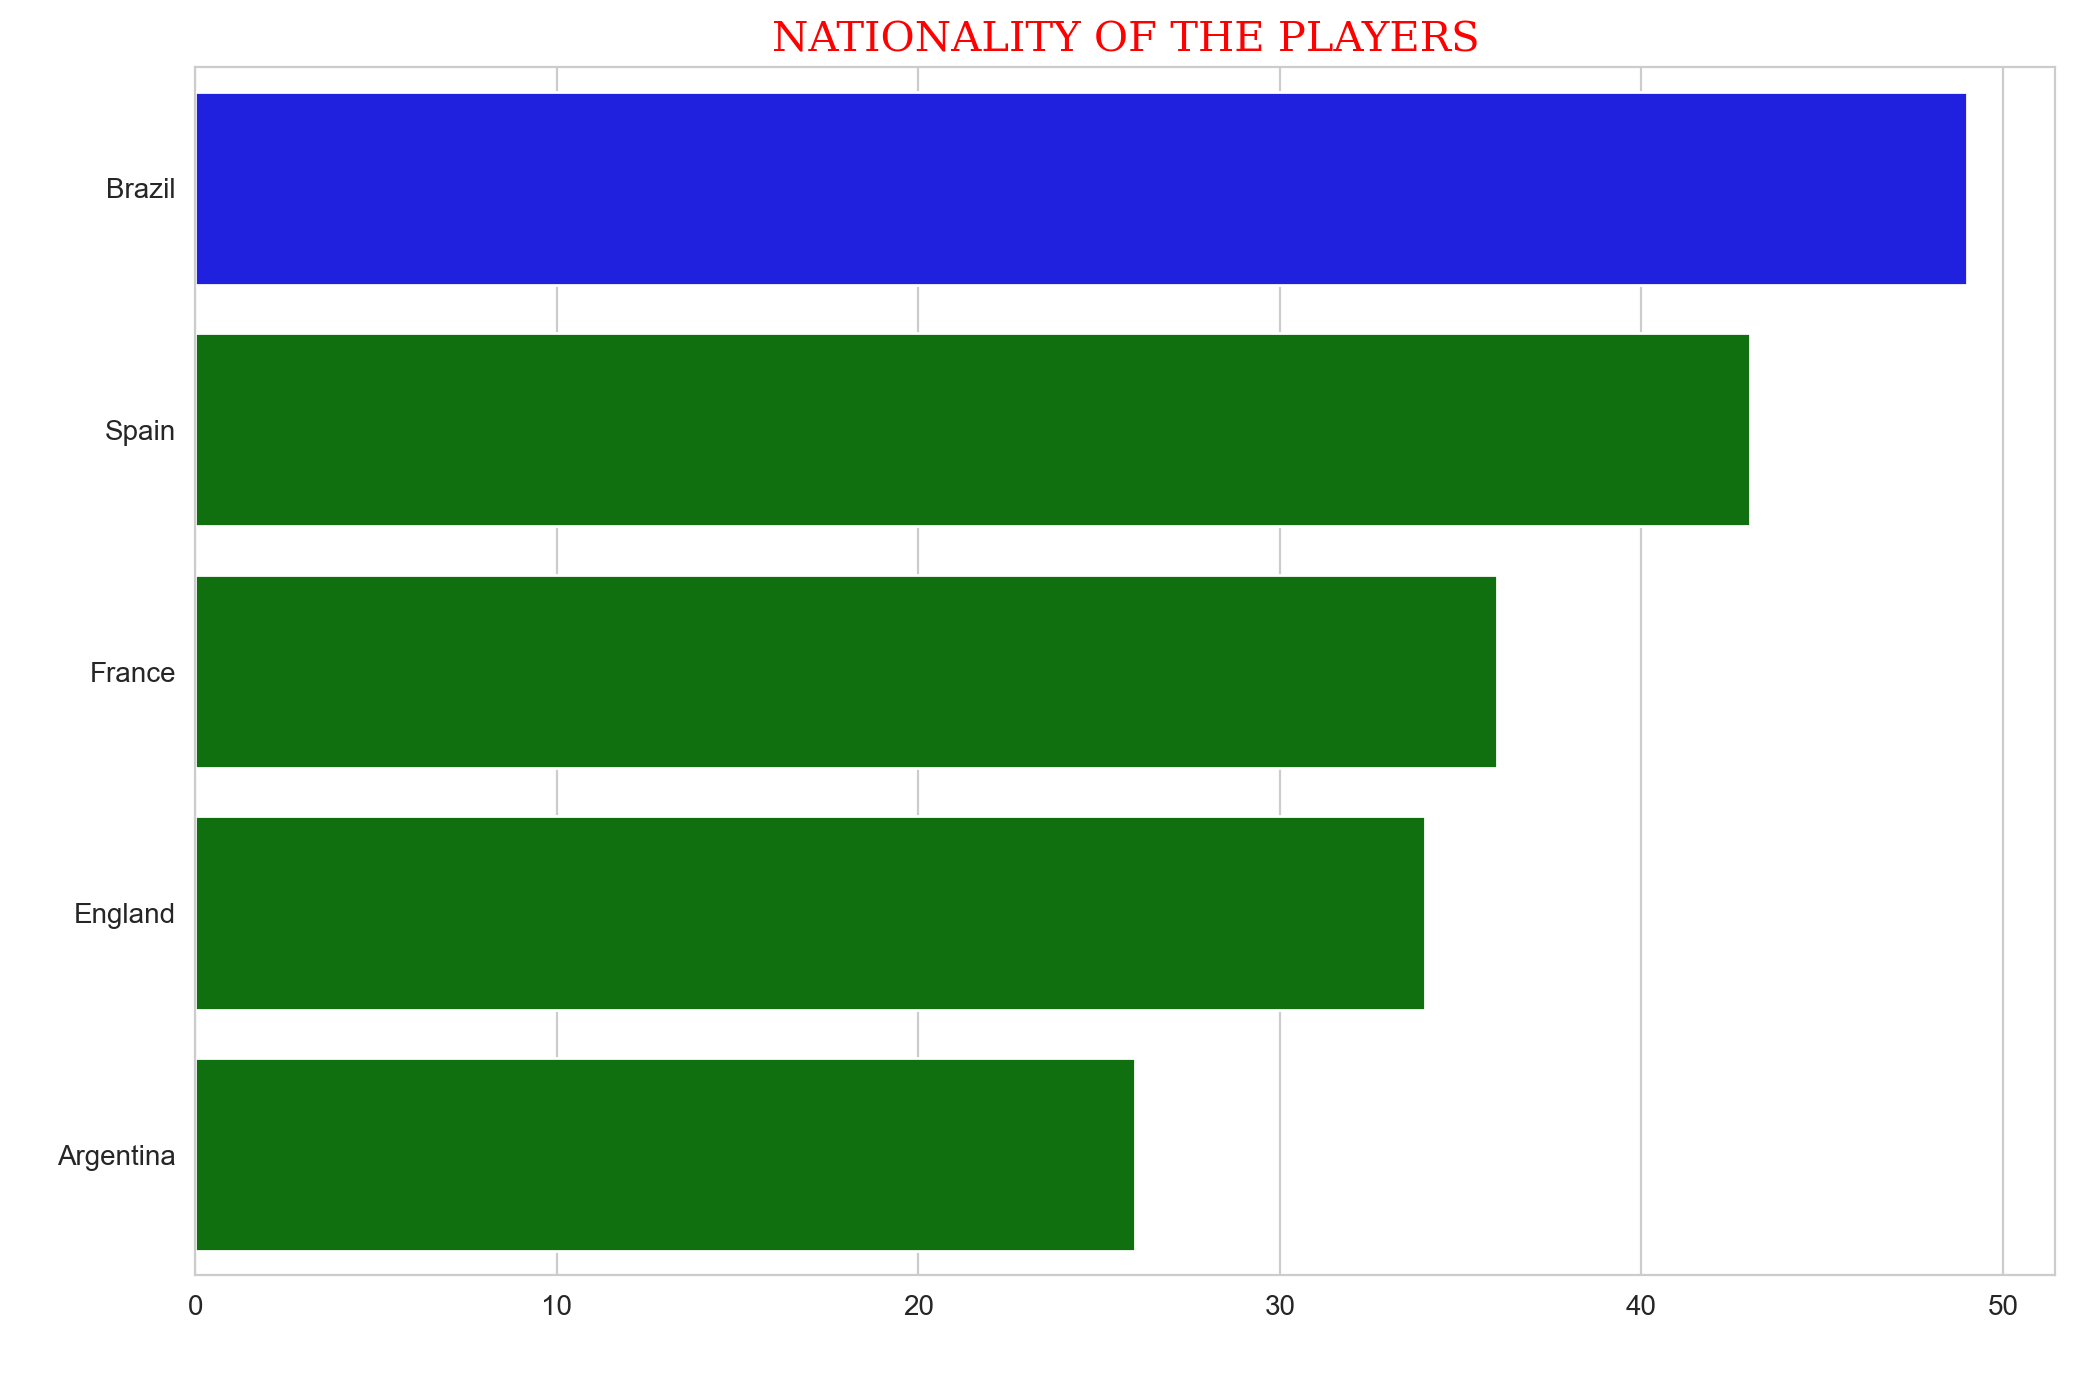

In [559]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(y = national.iloc[:5].index, x = 'INTERNATIONAL', data = national.iloc[:5], palette=['green' if x < 45 else 'blue' for x in national.iloc[:5].INTERNATIONAL.values])
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("NATIONALITY OF THE PLAYERS", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\Players'Nationality.png", dpi=200)

In [533]:
league = pd.Series.to_frame(df['LEAGUE'].value_counts())
league

,LEAGUE
Premier League,98
LaLiga,75
Serie A,57
Ligue 1,55
Bundesliga,47
Premier Liga,25
Liga Bwin,20
MLS,15
Série A,15
Eredivisie,13


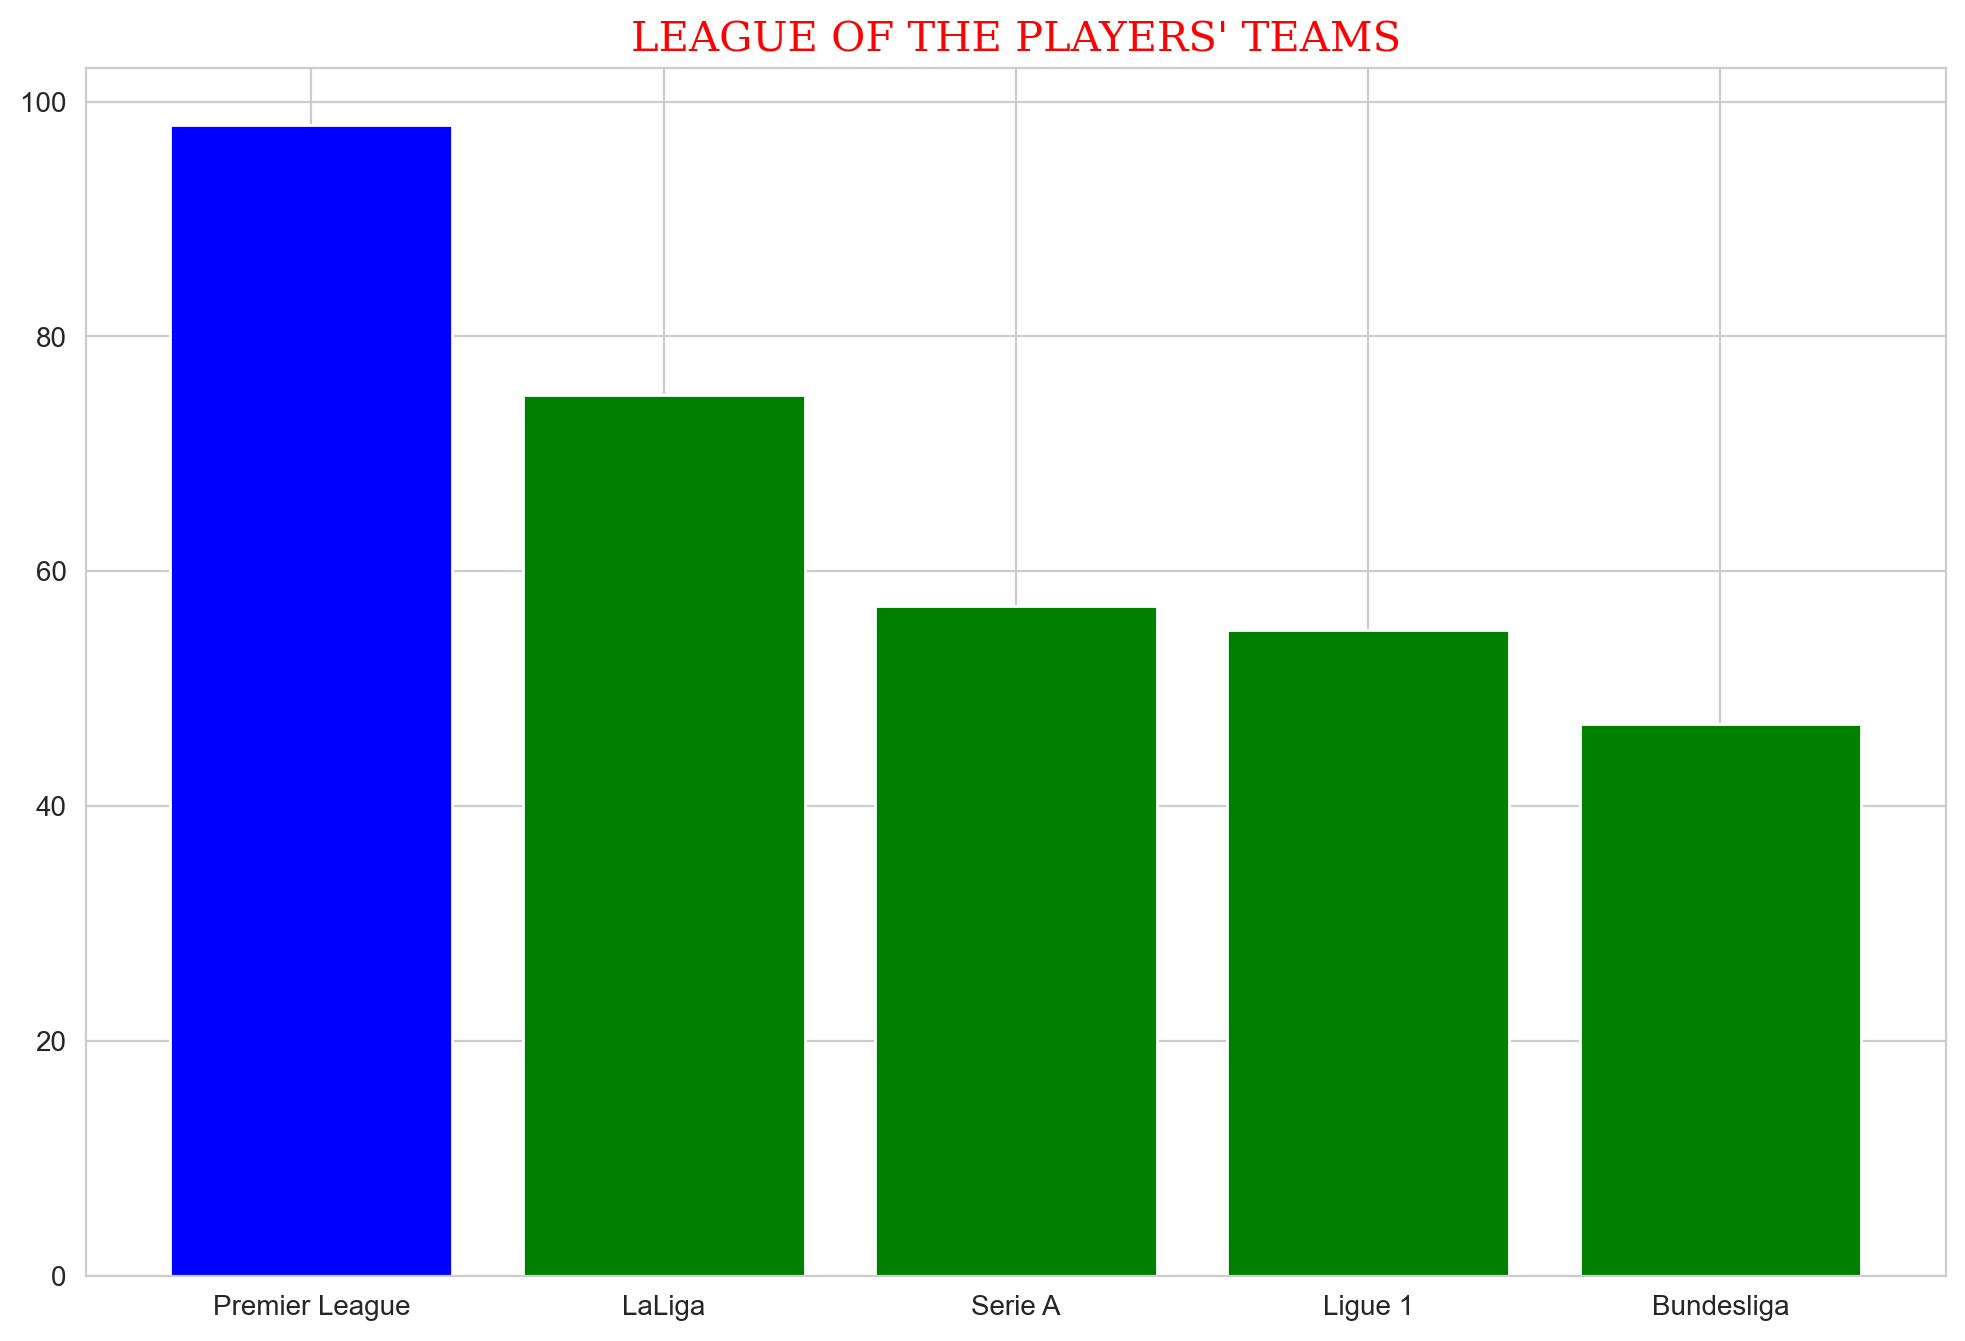

In [561]:
plt.figure(figsize=(12,8),dpi=200)
plt.bar(league.iloc[:5].index, league.iloc[:5].LEAGUE, color=['green' if x < 80 else 'blue' for x in league.iloc[:5].LEAGUE.values]);
#plt.xlabel(" ")
#plt.ylabel(" ")
plt.title("LEAGUE OF THE PLAYERS' TEAMS", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\Players'League.png", dpi=200)

In [538]:
club = pd.Series.to_frame(df['CLUB'].value_counts())
club.head(20)

,CLUB
Real Madrid,9
Sevilla FC,8
Liverpool,7
SSC Napoli,7
Benfica,7
Villarreal,7
Real Sociedad,7
Wolves,7
Juventus,7
Aston Villa,7


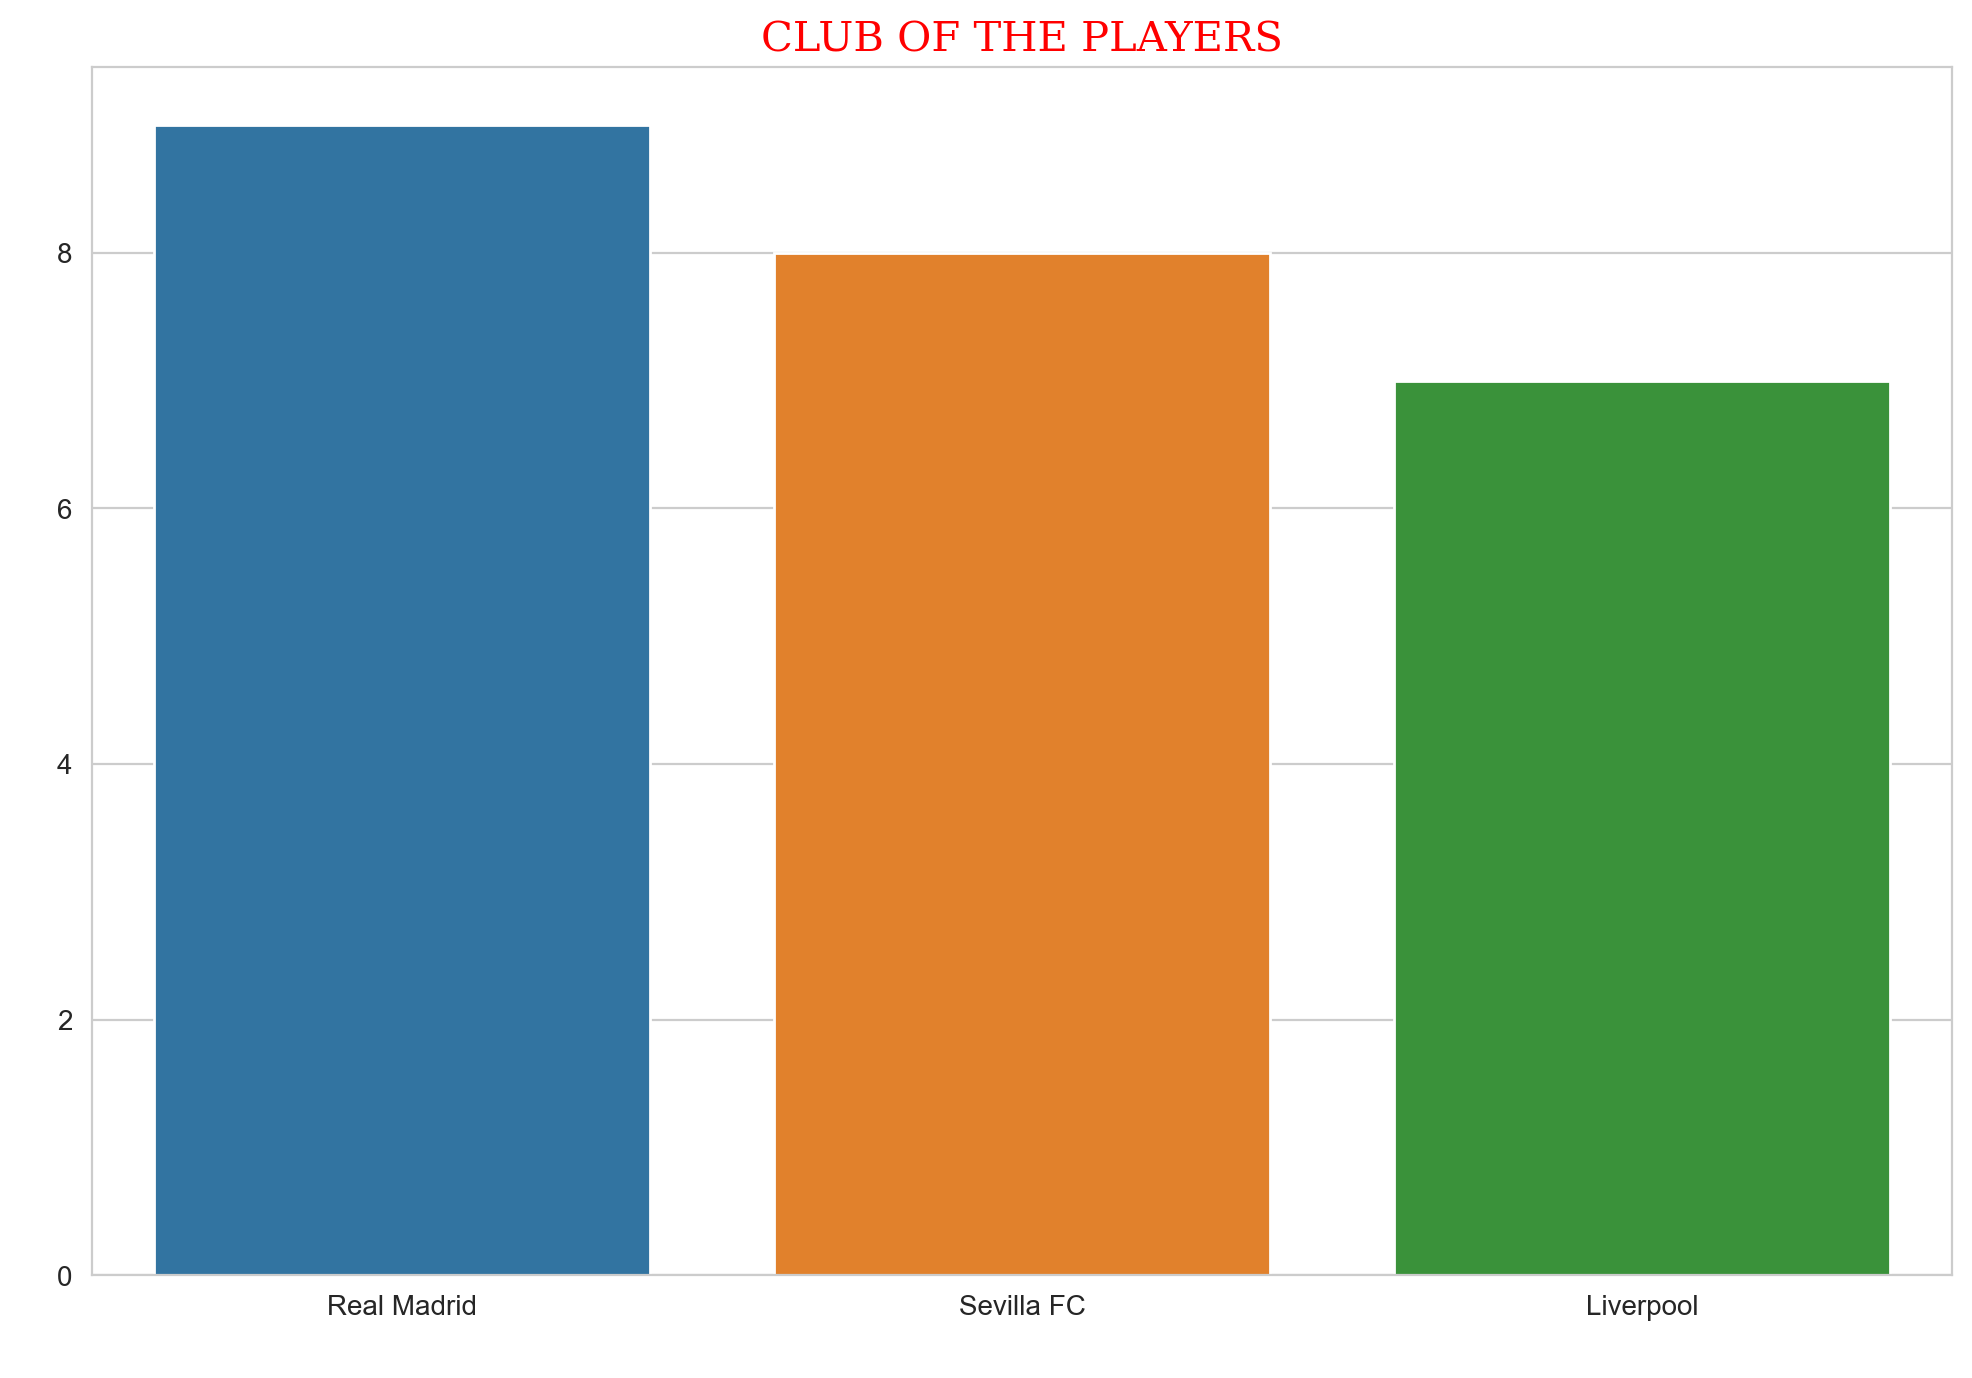

In [563]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(x = club.iloc[:3].index, y = 'CLUB', data = club.iloc[:3])
plt.ylabel(" ")
plt.xlabel(" ")
plt.title("CLUB OF THE PLAYERS", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\Players'Club.png", dpi=200)

In [546]:
#df.groupby(['PLAYERS_NAME','MARKET_VALUE', 'CLUB', 'INTERNATIONAL','AGE']).sum().sort_values("MARKET_VALUE", ascending = False)

df.iloc[:10]

,PLAYERS_NAME,MARKET_VALUE,POSITION,CLUB,AGE,LEAGUE,SEASON_MATCHES,SEASON_GOALS,SEASON_ASSISTS,S_MINUTES_PER_GOAL,S_MINUTES_PLAYED,INTERNATIONAL,FOOT,DATE
0,Kylian Mbappé,160.0,Centre-Forward,Paris SG,22,Ligue 1,23,13,14,148,1926,France,right,2021-12-15
1,Erling Haaland,150.0,Centre-Forward,Bor. Dortmund,21,Bundesliga,14,17,5,65,1112,Norway,left,2021-12-15
2,Harry Kane,120.0,Centre-Forward,Spurs,28,Premier League,20,8,2,202,1615,England,right,2021-12-15
3,Jack Grealish,100.0,Left Winger,Man City,26,Premier League,20,3,3,469,1406,England,right,2021-12-15
4,Mohamed Salah,100.0,Right Winger,Liverpool,29,Premier League,22,21,9,91,1908,Egypt,left,2021-12-15
5,Romelu Lukaku,100.0,Centre-Forward,Chelsea,28,Premier League,16,5,1,197,985,Belgium,left,2021-12-15
6,Neymar,100.0,Left Winger,Paris SG,29,Ligue 1,14,3,3,397,1191,Brazil,right,2021-12-15
7,Jadon Sancho,90.0,Left Winger,Man Utd,21,Premier League,19,2,0,514,1027,England,right,2021-12-15
8,Raheem Sterling,90.0,Left Winger,Man City,27,Premier League,22,6,3,214,1281,England,right,2021-12-15
9,Marcus Rashford,85.0,Left Winger,Man Utd,24,Premier League,12,3,1,218,655,England,right,2021-12-15


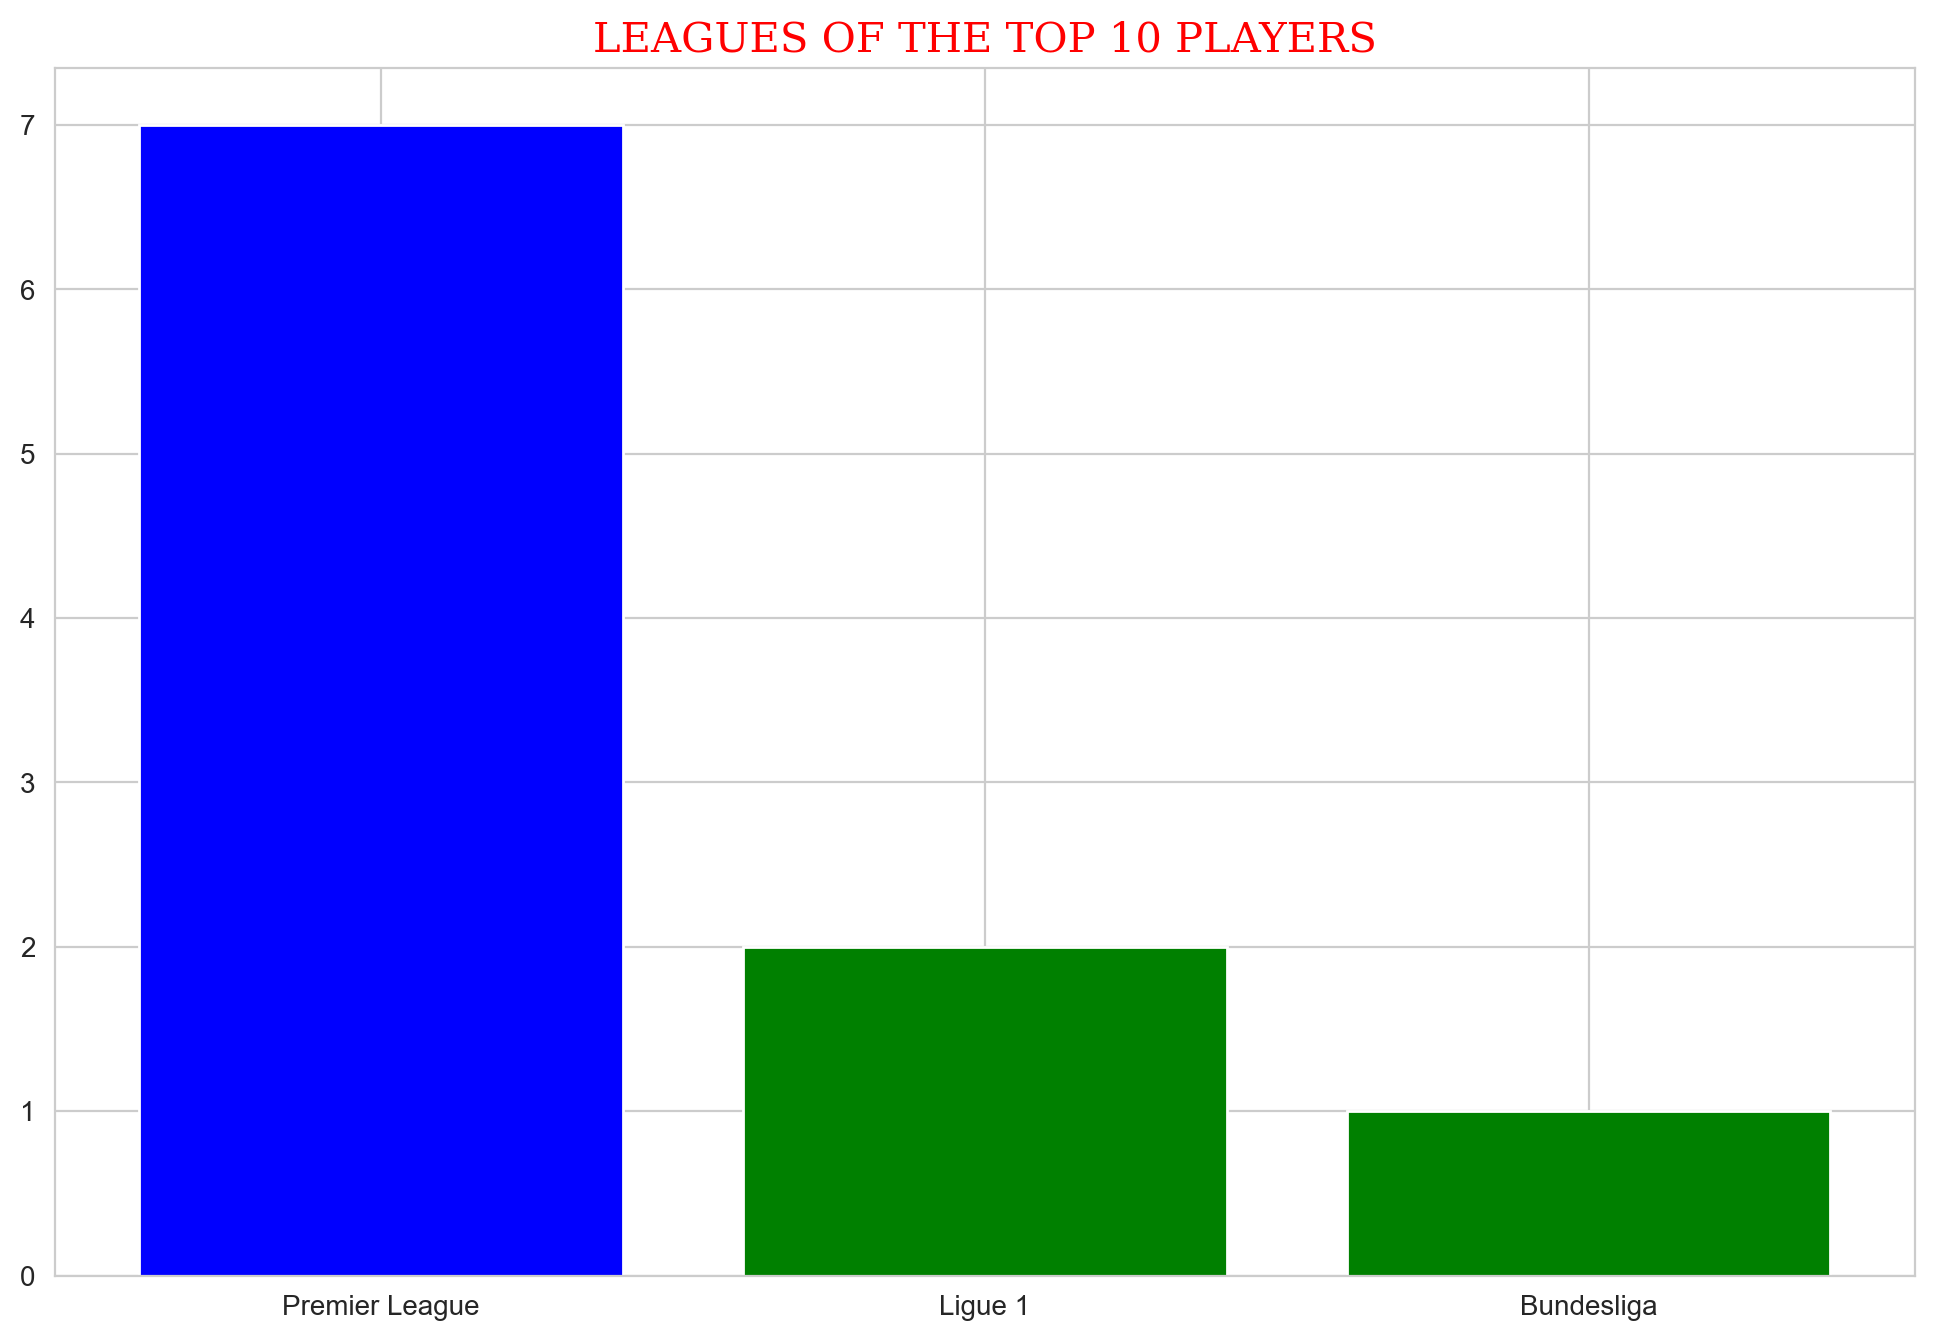

In [565]:
league_top10 = pd.Series.to_frame(df.iloc[:10]['LEAGUE'].value_counts())
plt.figure(figsize=(12,8),dpi=200)
plt.bar(league_top10.index, league_top10.LEAGUE, color=['green' if x < 5 else 'blue' for x in league_top10.LEAGUE.values]);
#plt.xlabel(" ")
#plt.ylabel(" ")
plt.title("LEAGUES OF THE TOP 10 PLAYERS", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\Players'LeagueTop10.png", dpi=200)

In [567]:
df_before_reg = df.copy()
df_before_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PLAYERS_NAME        500 non-null    object 
 1   MARKET_VALUE        500 non-null    float64
 2   POSITION            500 non-null    object 
 3   CLUB                500 non-null    object 
 4   AGE                 500 non-null    int32  
 5   LEAGUE              500 non-null    object 
 6   SEASON_MATCHES      500 non-null    int32  
 7   SEASON_GOALS        500 non-null    int32  
 8   SEASON_ASSISTS      500 non-null    int32  
 9   S_MINUTES_PER_GOAL  500 non-null    int32  
 10  S_MINUTES_PLAYED    500 non-null    int32  
 11  INTERNATIONAL       500 non-null    object 
 12  FOOT                500 non-null    object 
 13  DATE                500 non-null    object 
dtypes: float64(1), int32(6), object(7)
memory usage: 43.1+ KB


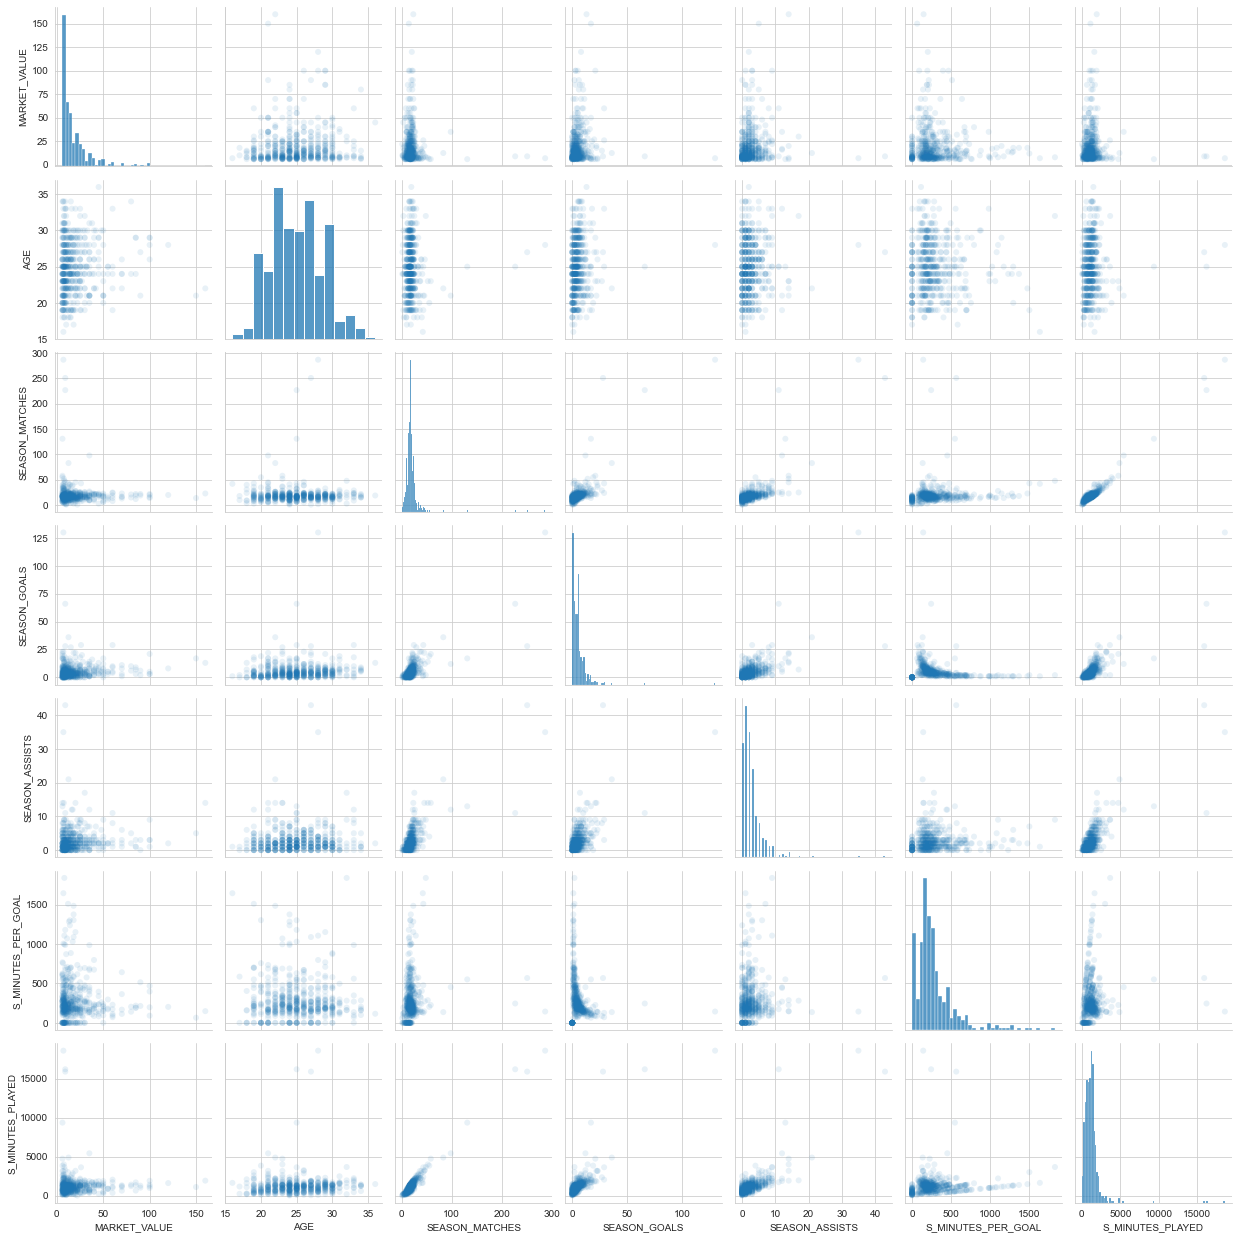

In [706]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\general.png", dpi=200)

In [570]:
club_group = df.groupby('CLUB')[['CLUB','MARKET_VALUE']].mean().sort_values(by='MARKET_VALUE', ascending=False).reset_index()
club_group

,CLUB,MARKET_VALUE
0,Paris SG,69.166667
1,Man City,59.333333
2,Chelsea,59.250000
3,Spurs,56.400000
4,Bor. Dortmund,56.250000
...,...,...
170,Galatasaray,6.000000
171,HNK Gorica,6.000000
172,Ittihad,6.000000
173,Trabzonspor,6.000000


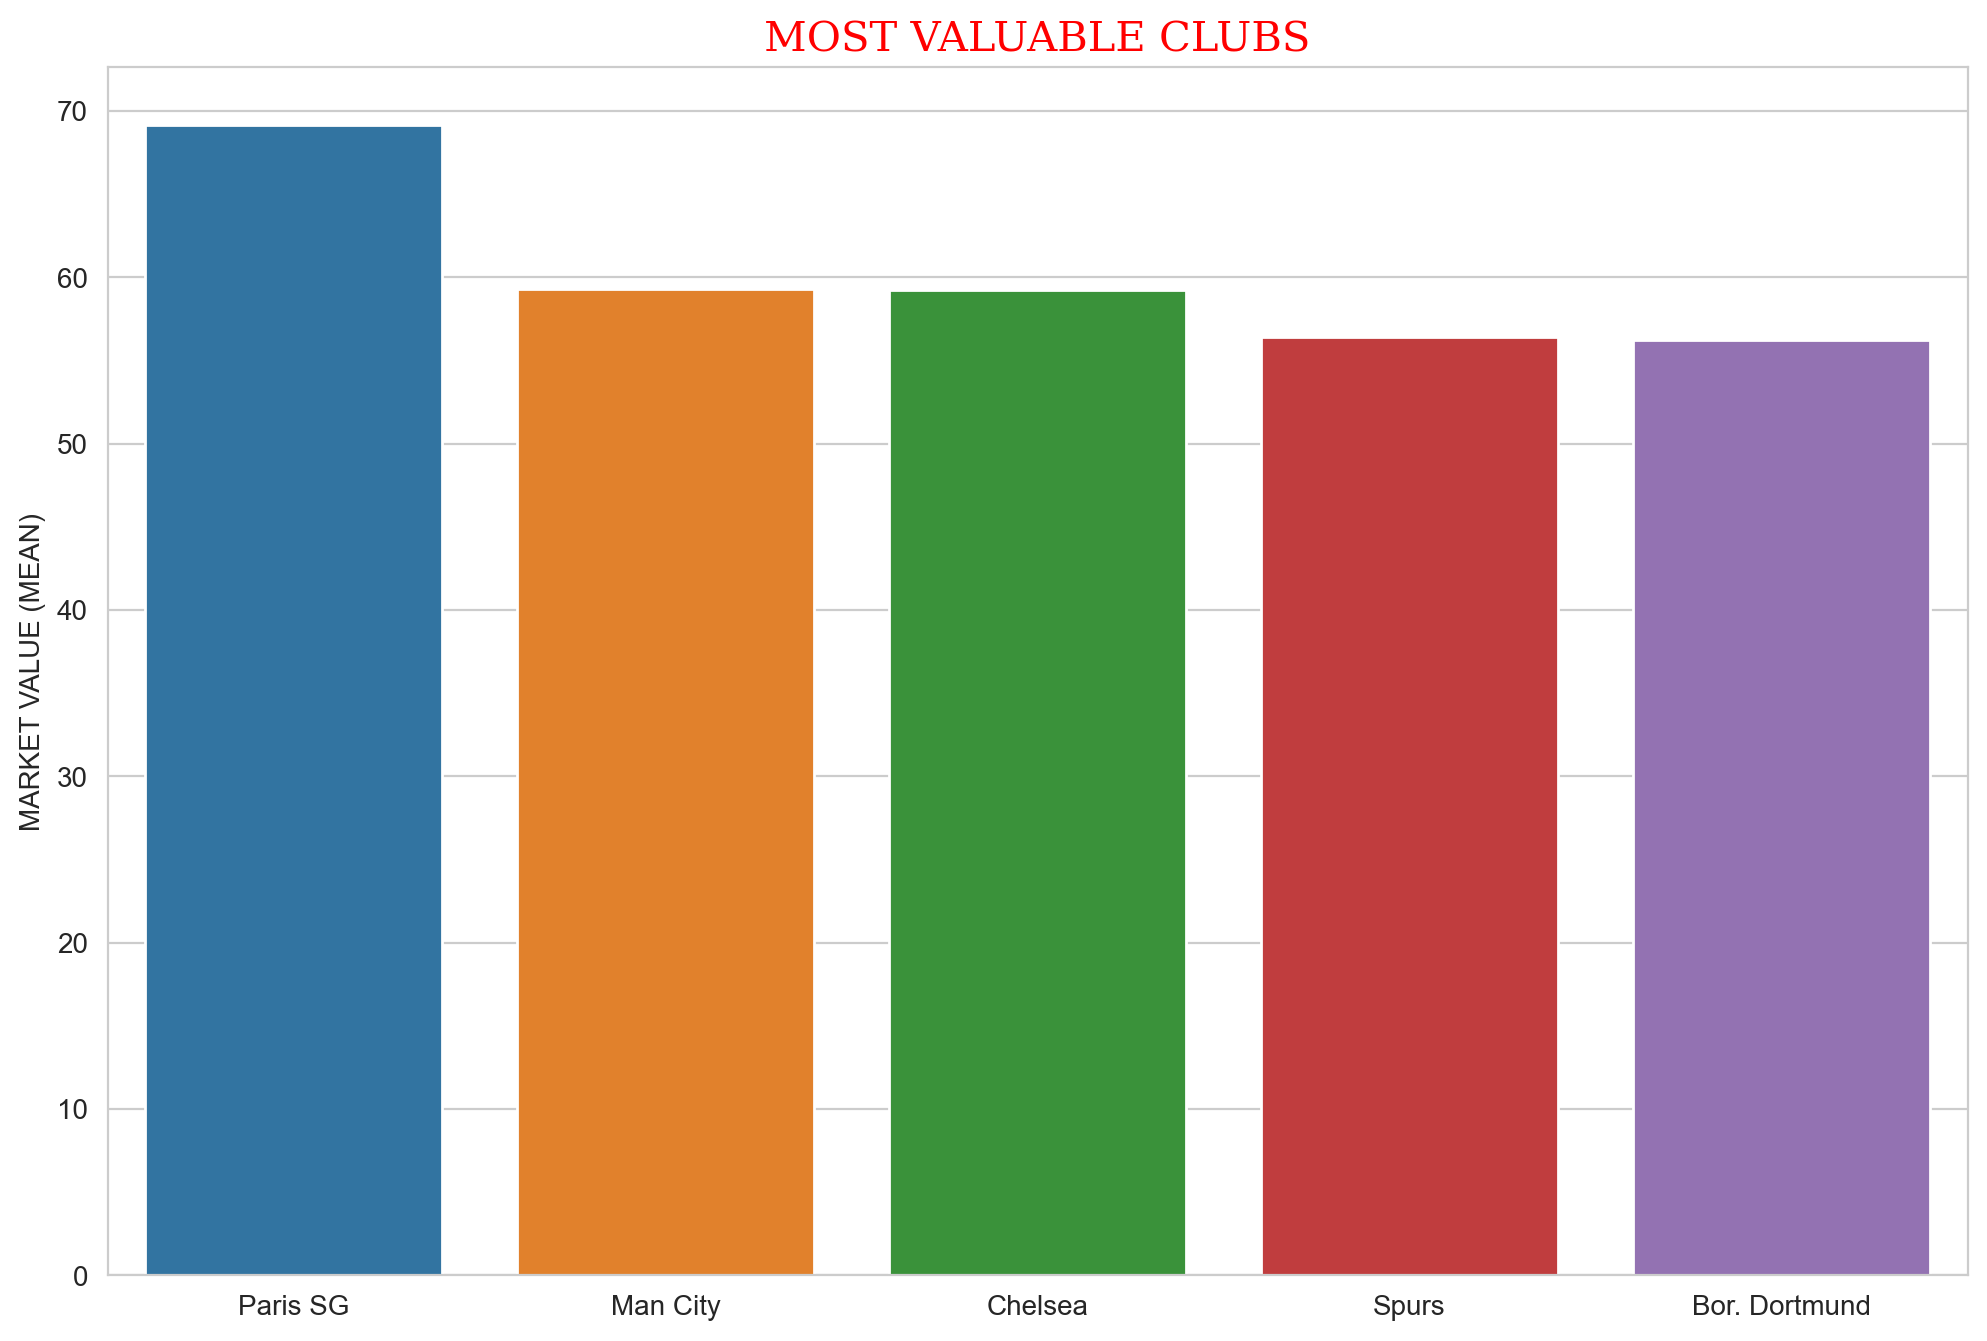

In [595]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(x='CLUB',y='MARKET_VALUE', data=club_group.iloc[:5])
plt.xlabel("")
plt.ylabel("MARKET VALUE (MEAN)")
plt.title("MOST VALUABLE CLUBS", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\MVP_Clubs.png", dpi=200)

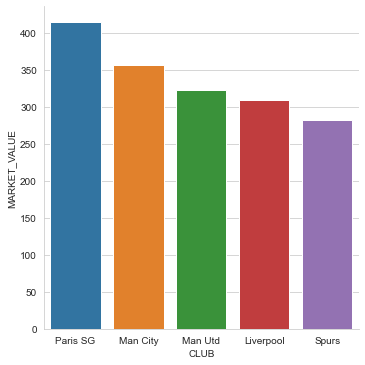

In [580]:
club_group2 = df.groupby('CLUB')[['CLUB','MARKET_VALUE']].sum().sort_values(by='MARKET_VALUE', ascending=False).reset_index()
sns.catplot(x='CLUB',y='MARKET_VALUE', data=club_group2.iloc[:5], kind="bar")

In [579]:
national_group = df.groupby('INTERNATIONAL')[['INTERNATIONAL','MARKET_VALUE']].sum().sort_values(by='MARKET_VALUE', ascending=False).reset_index()
national_group.head(10)

,INTERNATIONAL,MARKET_VALUE
0,England,1047.0
1,Brazil,932.0
2,France,873.0
3,Spain,807.5
4,Argentina,589.2
5,Portugal,498.5
6,Italy,489.5
7,Germany,391.5
8,Netherlands,328.0
9,Belgium,327.0


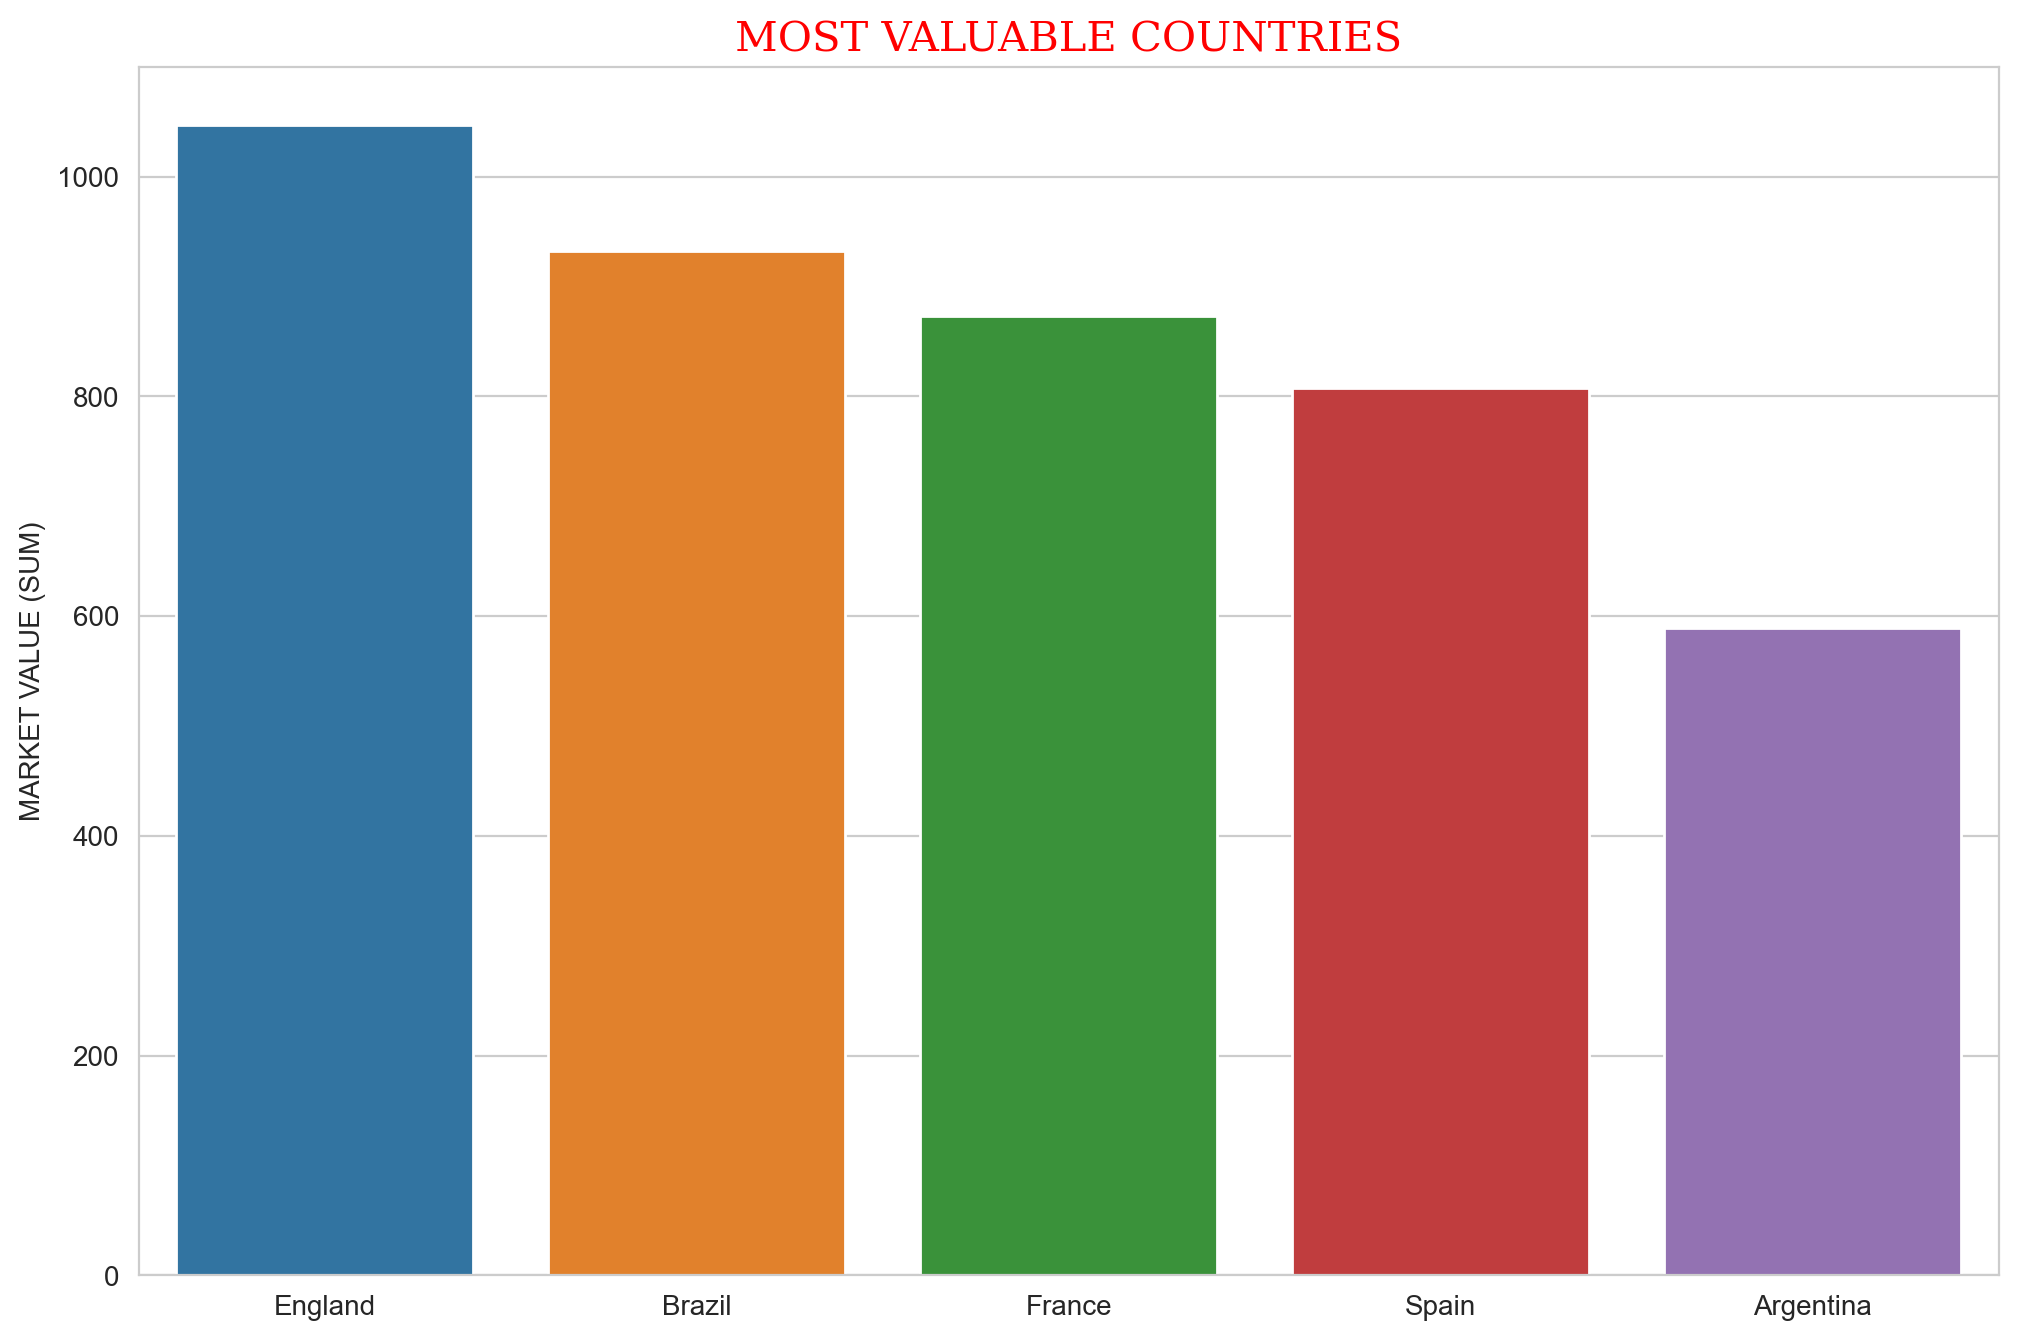

In [596]:
plt.figure(figsize=(12,8),dpi=200)
sns.set_style("whitegrid")
sns.barplot(x='INTERNATIONAL',y='MARKET_VALUE', data=national_group.iloc[:5])
plt.xlabel("")
plt.ylabel("MARKET VALUE (SUM)")
plt.title("MOST VALUABLE COUNTRIES", family='serif',fontsize = 15,loc='center',color='r')
plt.savefig(r"C:\Users\Fatih GÜLTÜRK\Desktop\proje2_görseller\MVP_Countries.png", dpi=200)

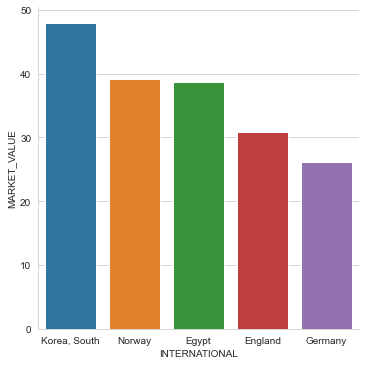

In [582]:
national_group2 = df.groupby('INTERNATIONAL')[['INTERNATIONAL','MARKET_VALUE']].mean().sort_values(by='MARKET_VALUE', ascending=False).reset_index()
sns.catplot(x='INTERNATIONAL',y='MARKET_VALUE', data=national_group2.iloc[:5], kind="bar")

In [616]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame,Series


def linear_regression(x,y):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)
    model = LinearRegression()
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    mse = np.mean((y_test-predict)**2)
    
    print("Model Score: ", model.score(x_test,y_test))
    print("MSE: ", mse)
    coeff = DataFrame(x_train.columns)
    
    
    coeff['Coef Est'] = Series(model.coef_)
    print(coeff.sort_values(by='Coef Est', ascending=False))



In [635]:
player_reg1 = df.select_dtypes(exclude=['object'])
player_reg1['MARKET_VALUE'] = df['MARKET_VALUE'].copy()
player_reg1['FOOT'] = df['FOOT'].copy()
player_reg1['S_MINUTES_PER_GOAL'] = df['S_MINUTES_PER_GOAL']
player_reg1['SEASON_ASSISTS'] = df['SEASON_ASSISTS']/df['SEASON_MATCHES']
player_reg1['MARKET_VALUE'] = df['MARKET_VALUE']
player_reg1 = pd.get_dummies(player_reg, columns=['FOOT'])
player_reg1.corr()['MARKET_VALUE'].sort_values(ascending=False)

NameError: name 'player_reg1' is not defined

In [659]:
player_reg1 = df.select_dtypes(exclude=['object'])
player_reg1 = player_reg1.drop(columns=['SEASON_MATCHES','SEASON_GOALS','SEASON_ASSISTS','S_MINUTES_PLAYED'])
player_reg1

,MARKET_VALUE,AGE,S_MINUTES_PER_GOAL
0,160.0,22,148
1,150.0,21,65
2,120.0,28,202
3,100.0,26,469
4,100.0,29,91
...,...,...,...
495,6.0,26,295
496,6.0,25,278
497,6.0,29,596
498,6.0,30,253


In [644]:
df

,PLAYERS_NAME,MARKET_VALUE,POSITION,CLUB,AGE,LEAGUE,SEASON_MATCHES,SEASON_GOALS,SEASON_ASSISTS,S_MINUTES_PER_GOAL,S_MINUTES_PLAYED,INTERNATIONAL,FOOT,DATE
0,Kylian Mbappé,160.0,Centre-Forward,Paris SG,22,Ligue 1,23,13,14,148,1926,France,right,2021-12-15
1,Erling Haaland,150.0,Centre-Forward,Bor. Dortmund,21,Bundesliga,14,17,5,65,1112,Norway,left,2021-12-15
2,Harry Kane,120.0,Centre-Forward,Spurs,28,Premier League,20,8,2,202,1615,England,right,2021-12-15
3,Jack Grealish,100.0,Left Winger,Man City,26,Premier League,20,3,3,469,1406,England,right,2021-12-15
4,Mohamed Salah,100.0,Right Winger,Liverpool,29,Premier League,22,21,9,91,1908,Egypt,left,2021-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Callum Robinson,6.0,Centre-Forward,West Brom,26,Championship,20,4,6,295,1178,Ireland,right,2021-12-15
496,Rony Lopes,6.0,Right Winger,Olympiacos,25,Super League 1,15,2,2,278,556,Portugal,left,2021-12-15
497,Djordje Despotovic,6.0,Centre-Forward,Rubin Kazan,29,Premier Liga,10,1,1,596,596,Serbia,left,2021-12-15
498,Roberto Inglese,6.0,Centre-Forward,Parma,30,Serie B,17,3,2,253,760,Italy,right,2021-12-15


In [660]:
player_reg1['FOOT'] = df['FOOT']
player_reg1 = pd.get_dummies(player_reg1, columns=['FOOT'])
player_reg1['SEASON_ASSISTS'] = df['SEASON_ASSISTS']/df['SEASON_MATCHES']
player_reg1

,MARKET_VALUE,AGE,S_MINUTES_PER_GOAL,FOOT_both,FOOT_left,FOOT_right,SEASON_ASSISTS
0,160.0,22,148,0,0,1,0.608696
1,150.0,21,65,0,1,0,0.357143
2,120.0,28,202,0,0,1,0.100000
3,100.0,26,469,0,0,1,0.150000
4,100.0,29,91,0,1,0,0.409091
...,...,...,...,...,...,...,...
495,6.0,26,295,0,0,1,0.300000
496,6.0,25,278,0,1,0,0.133333
497,6.0,29,596,0,1,0,0.100000
498,6.0,30,253,0,0,1,0.117647


In [661]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame,Series



x,y = player_reg1.drop('MARKET_VALUE',axis=1), player_reg1['MARKET_VALUE']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)
model = LinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
mse = np.mean((y_test-predict)**2)
    
print("Model Score: ", model.score(x_test,y_test))
print("MSE: ", mse)

Model Score:  0.012846472530993913
MSE:  433.3104485904038


In [662]:
player_reg1['INTERNATIONAL'] = df['INTERNATIONAL']
player_reg1['CLUB'] = df['CLUB']
player_reg1['LEAGUE'] = df['LEAGUE']
player_reg1['POSITION'] = df['POSITION']

player_reg1 = pd.get_dummies(player_reg1, columns=['INTERNATIONAL'])
player_reg1 = pd.get_dummies(player_reg1, columns=['CLUB'])
player_reg1 = pd.get_dummies(player_reg1, columns=['LEAGUE'])
player_reg1 = pd.get_dummies(player_reg1, columns=['POSITION'])


In [663]:
player_reg1

,MARKET_VALUE,AGE,S_MINUTES_PER_GOAL,FOOT_both,FOOT_left,FOOT_right,SEASON_ASSISTS,"INTERNATIONAL_1,80 m",INTERNATIONAL_Algeria,INTERNATIONAL_Angola,...,LEAGUE_Stars League,LEAGUE_Super League,LEAGUE_Super League 1,LEAGUE_Superligaen,LEAGUE_Série A,LEAGUE_Süper Lig,POSITION_Centre-Forward,POSITION_Left Winger,POSITION_Right Winger,POSITION_Second Striker
0,160.0,22,148,0,0,1,0.608696,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,150.0,21,65,0,1,0,0.357143,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,120.0,28,202,0,0,1,0.100000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,100.0,26,469,0,0,1,0.150000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,100.0,29,91,0,1,0,0.409091,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6.0,26,295,0,0,1,0.300000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
496,6.0,25,278,0,1,0,0.133333,0,0,0,...,0,0,1,0,0,0,0,0,1,0
497,6.0,29,596,0,1,0,0.100000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
498,6.0,30,253,0,0,1,0.117647,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [691]:

x,y = player_reg1.drop('MARKET_VALUE',axis=1), player_reg1['MARKET_VALUE']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)
model = LinearRegression()
model.fit(x_train,y_train)
predict_lr = model.predict(x_test)
mse_lr = np.mean((y_test-predict_lr)**2)

print("Model Score: ", model.score(x_test,y_test))
print("MSE: ", mse_lr)

Model Score:  -4.104034684847233e+17
MSE:  1.8014635624928825e+20


In [665]:
player_reg1

,MARKET_VALUE,AGE,S_MINUTES_PER_GOAL,FOOT_both,FOOT_left,FOOT_right,SEASON_ASSISTS,"INTERNATIONAL_1,80 m",INTERNATIONAL_Algeria,INTERNATIONAL_Angola,...,LEAGUE_Stars League,LEAGUE_Super League,LEAGUE_Super League 1,LEAGUE_Superligaen,LEAGUE_Série A,LEAGUE_Süper Lig,POSITION_Centre-Forward,POSITION_Left Winger,POSITION_Right Winger,POSITION_Second Striker
0,160.0,22,148,0,0,1,0.608696,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,150.0,21,65,0,1,0,0.357143,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,120.0,28,202,0,0,1,0.100000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,100.0,26,469,0,0,1,0.150000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,100.0,29,91,0,1,0,0.409091,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6.0,26,295,0,0,1,0.300000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
496,6.0,25,278,0,1,0,0.133333,0,0,0,...,0,0,1,0,0,0,0,0,1,0
497,6.0,29,596,0,1,0,0.100000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
498,6.0,30,253,0,0,1,0.117647,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [658]:
from sklearn.linear_model import Lasso
lassoReg  = Lasso(alpha=1, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

mse = np.mean((pred- y_test)**2)

print(mse)

lassoReg.score(x_test,y_test)


439.30134556250005


-0.0008017907360164944

In [692]:
from sklearn.preprocessing import PolynomialFeatures

x,y = player_reg1.drop('MARKET_VALUE',axis=1), player_reg1['MARKET_VALUE']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)


poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train.values)
x_test_poly = poly.transform(x_test.values)

lm_poly = LinearRegression()

lm_poly.fit(x_train_poly,y_train)

lm_poly.score(x_test_poly, y_test)

predict_poly = lm_rid.predict(x_test_scaled)
mse_poly = np.mean((y_test-predict_poly)**2)


In [693]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

x,y = player_reg1.drop('MARKET_VALUE',axis=1), player_reg1['MARKET_VALUE']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.fit_transform(x_test)

lm_rid = Ridge(alpha=120)

lm_rid.fit(x_train_scaled, y_train)
lm_rid.score(x_test_scaled, y_test)

predict_reg = lm_rid.predict(x_test_scaled)
mse_reg = np.mean((y_test-predict_reg)**2)

In [694]:
mse_reg

311.45303505578426

In [697]:
lm_rid.score(x_test_scaled, y_test)

0.2904580002711378

In [698]:
d = {'RegressionType': ['LinearRegression', 'Ridge Regression', 'Polynomial Regression'], 'Score': [model.score(x_test,y_test), lm_rid.score(x_test_scaled, y_test), lm_poly.score(x_test_poly, y_test)], 'MSE': [mse_lr, mse_reg, mse_poly]}
df_sonuc = pd.DataFrame(data=d)
df_sonuc

,RegressionType,Score,MSE
0,LinearRegression,-4.104035e+17,1.801464e+20
1,Ridge Regression,2.904580e-01,3.114530e+02
2,Polynomial Regression,-1.672913e+01,3.114530e+02


In [699]:
x,y = player_reg1.drop('MARKET_VALUE',axis=1), player_reg1['MARKET_VALUE']
linear_regression(x,y)

Model Score:  -4.104034684847233e+17
MSE:  1.8014635624928825e+20
                           0      Coef Est
281  POSITION_Centre-Forward  1.296417e+11
284  POSITION_Second Striker  1.296417e+11
282     POSITION_Left Winger  1.296417e+11
283    POSITION_Right Winger  1.296417e+11
269      LEAGUE_Premier Liga  1.126983e+11
..                       ...           ...
115         CLUB_CSKA Moscow -4.129949e+10
214       CLUB_Saint-Étienne -4.360116e+10
2                  FOOT_both -1.398475e+11
4                 FOOT_right -1.398475e+11
3                  FOOT_left -1.398475e+11

[285 rows x 2 columns]


In [705]:
print('Correlation between MARKET_VALUE and the other columns')
player_reg1.corr()['MARKET_VALUE'].sort_values(ascending=False)

Correlation between MARKET_VALUE and the other columns


MARKET_VALUE             1.000000
CLUB_Paris SG            0.286301
LEAGUE_Premier League    0.253138
CLUB_Man City            0.229770
SEASON_ASSISTS           0.223383
                           ...   
LEAGUE_Süper Lig        -0.071243
LEAGUE_Championship     -0.077196
LEAGUE_Premier Liga     -0.083357
LEAGUE_Série A          -0.084692
LEAGUE_MLS              -0.103040
Name: MARKET_VALUE, Length: 286, dtype: float64